<a href="https://colab.research.google.com/github/MMBAYAR/Spring24_MIS356/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 10

# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams['figure.figsize'] = [6.3,4.725]
plt.rcParams['figure.dpi'] = 150
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [ ]:
df = pd.read_csv(
                '/content/Auto(refurbished).csv'
                )

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford
393,44.0,4,97.0,52.0,2130,24.6,82,2,volkswagen
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford


In [ ]:
#  Data Preprocessing
#    quantizing verbal data
df.make.unique()
df.make.replace( ['maxda',], 'mazda', inplace = True )
df.make = [list(df.make.unique()).index( i ) for i in df.make]

#    centering around 0: standard scalarization
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(
columns = df.columns,
data = StandardScaler(with_mean = True, with_std = True).fit_transform(df)
)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
0,-0.705720,1.495535,1.088435,0.674306,0.630274,-1.294604,-1.626699,-0.716507,-1.102243
1,-1.089551,1.495535,1.500913,1.587955,0.853457,-1.476652,-1.626699,-0.716507,-0.964159
2,-0.705720,1.495535,1.193953,1.196391,0.549975,-1.658700,-1.626699,-0.716507,-0.826074
3,-0.961608,1.495535,1.059658,1.196391,0.546432,-1.294604,-1.626699,-0.716507,-0.687989
4,-0.833664,1.495535,1.040473,0.935348,0.565326,-1.840747,-1.626699,-0.716507,-0.549904
...,...,...,...,...,...,...,...,...,...
392,0.445772,-0.858191,-0.513513,-0.474282,-0.212865,0.016141,1.629433,-0.716507,-0.549904
393,2.620814,-0.858191,-0.925991,-1.361828,-0.992237,3.293004,1.629433,0.531095,0.140520
394,1.085491,-0.858191,-0.561476,-0.526491,-0.797394,-1.440242,1.629433,-0.716507,-0.273735
395,0.573716,-0.858191,-0.705363,-0.657012,-0.407708,1.108429,1.629433,-0.716507,-0.549904


In [ ]:
#  Method 1: numpy.linalg.svd()
U, D, V = np.linalg.svd( df )

#    loadings of 1st principal component
V

array([[ 3.80438555e-01, -3.94956828e-01, -4.09227615e-01,
        -3.91914064e-01, -3.93858231e-01,  2.56344953e-01,
         2.11166894e-01,  2.83418120e-01,  1.80159390e-01],
       [ 6.48997467e-03,  5.22856597e-02,  4.79239620e-02,
         2.39579516e-01,  2.16677226e-02, -4.16917116e-01,
        -1.17906808e-01,  5.19576392e-01,  6.92371306e-01],
       [ 2.02766581e-01,  1.83064404e-01,  1.69641372e-01,
         7.58122784e-02,  2.17955527e-01, -4.37327095e-04,
         8.82936251e-01, -1.50671836e-01,  2.02643069e-01],
       [-2.54327436e-01,  1.25933547e-01,  8.59461695e-02,
        -9.80906349e-02,  2.61984510e-01,  7.72965366e-01,
        -1.48530444e-01, -1.31808395e-02,  4.62713099e-01],
       [-1.25061975e-02, -1.69891751e-01, -9.13066679e-02,
        -1.25365367e-01, -1.89214222e-01, -2.44583330e-01,
        -1.29998539e-01, -7.76175553e-01,  4.81617971e-01],
       [-7.39264981e-01, -4.80811569e-01, -3.00231634e-01,
         7.98864832e-02,  1.39856180e-01, -9.440596

<Axes: >

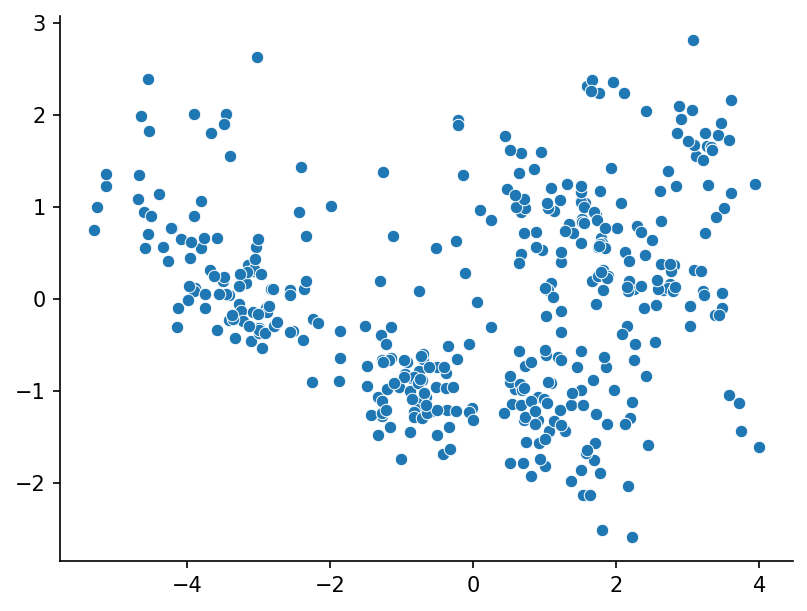

In [ ]:
sns.scatterplot(
x = [i.sum() for i in df.values*V[0]],
y = [i.sum() for i in df.values*V[1]]
)

In [1]:
#  Creating a new feature based on 2D observation
#    Assuming there are 6 distinct clusters
#    KMEANS clustering
from sklearn.cluster import KMeans
KMeans(n_clusters = 6).fit_predict(df.values)

sns.scatterplot(
x = [i.sum() for i in df.values*V[0]],
y = [i.sum() for i in df.values*V[1]],
hue =  KMeans(n_clusters = 5).fit_predict(df.values)
)

NameError: name 'df' is not defined

In [ ]:
df.loc[:,'1vs2PCA'] = KMeans(n_clusters = 5).fit_predict(df.values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make,1vs2PCA
0,-0.705720,1.495535,1.088435,0.674306,0.630274,-1.294604,-1.626699,-0.716507,-1.102243,2
1,-1.089551,1.495535,1.500913,1.587955,0.853457,-1.476652,-1.626699,-0.716507,-0.964159,2
2,-0.705720,1.495535,1.193953,1.196391,0.549975,-1.658700,-1.626699,-0.716507,-0.826074,2
3,-0.961608,1.495535,1.059658,1.196391,0.546432,-1.294604,-1.626699,-0.716507,-0.687989,2
4,-0.833664,1.495535,1.040473,0.935348,0.565326,-1.840747,-1.626699,-0.716507,-0.549904,2
...,...,...,...,...,...,...,...,...,...,...
392,0.445772,-0.858191,-0.513513,-0.474282,-0.212865,0.016141,1.629433,-0.716507,-0.549904,4
393,2.620814,-0.858191,-0.925991,-1.361828,-0.992237,3.293004,1.629433,0.531095,0.140520,1
394,1.085491,-0.858191,-0.561476,-0.526491,-0.797394,-1.440242,1.629433,-0.716507,-0.273735,4
395,0.573716,-0.858191,-0.705363,-0.657012,-0.407708,1.108429,1.629433,-0.716507,-0.549904,4


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'make', '1vs2PCA'],
      dtype='object')

In [ ]:
#  HP wout 1vs2PCA

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 4).fit(
X = df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'make']].values,
y = df['horsepower'].values
)

model.predict( df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'make']].sample(frac=.3, random_state = 27).values )

from sklearn.metrics import mean_squared_error
mean_squared_error(
df[['horsepower']].sample(frac=.3, random_state = 27).values,
model.predict( df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'make']].sample(frac=.3, random_state = 27).values )
)

0.06173483426048547

In [ ]:
#  HP w 1vs2PCA

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 4).fit(
X = df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'make', '1vs2PCA']].values,
y = df['horsepower'].values
)

model.predict( df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'make', '1vs2PCA']].sample(frac=.3, random_state = 27).values )

from sklearn.metrics import mean_squared_error
mean_squared_error(
df[['horsepower']].sample(frac=.3, random_state = 27).values,
model.predict( df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'make', '1vs2PCA']].sample(frac=.3, random_state = 27).values )
)

0.062333593508446514